In [7]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv('./datasets/Iris.csv')

# Dimensiones
print("*" * 40)
print(f"Shape: {df.shape}")  # (150, 5)
print("*" * 40)
# Tipos de datos
print(df.dtypes)
print("*" * 40)
# Primeras filas
print(df.head())
print("*" * 40)
# Resumen rápido
print(df.info())
print("*" * 40)
# Valores faltantes
print(df.isnull().sum())

****************************************
Shape: (150, 6)
****************************************
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
****************************************
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detección por IQR
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['SepalLengthCm'] < Q1 - 1.5*IQR) | (df['SepalLengthCm'] > Q3 + 1.5*IQR)
print(f"Outliers detectados: {outliers.sum()}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Box plot
axes[0].boxplot(df['SepalLengthCm'])
axes[0].set_title('Box Plot - Sepal Length')
axes[0].set_ylabel('Valor')

# Scatter plot
axes[1].scatter(range(len(df)), df['SepalLengthCm'].sort_values())
axes[1].set_title('Distribución de valores')
axes[1].set_ylabel('Sepal Length (ordenado)')

plt.tight_layout()
plt.savefig('images/outliers_detection.png', dpi=600, bbox_inches='tight')
plt.close()

Outliers detectados: 0


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Valores originales
print("*" * 40)
print("Valores originales:")
print(f"Min: {df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].min().values}")
print(f"Max: {df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].max().values}")
print("*" * 40)
# Estandarización (recomendado para modelos lineales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Después de estandarizar, cada feature tiene media=0 y std=1
print(f"Media: {X_scaled.mean(axis=0)}")  # ~0
print(f"Std: {X_scaled.std(axis=0)}")     # ~1
print("*" * 40)
# Normalización (alternativa)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Rango: [0, 1]
print(f"Min: {X_normalized.min(axis=0)}")
print(f"Max: {X_normalized.max(axis=0)}")
print("*" * 40)

****************************************
Valores originales:
Min: [4.3 2.  1.  0.1]
Max: [7.9 4.4 6.9 2.5]
****************************************
Media: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Std: [1. 1. 1. 1.]
****************************************
Min: [0. 0. 0. 0.]
Max: [1. 1. 1. 1.]
****************************************


In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding (solo si es ordinal)
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])
# setosa → 0, versicolor → 1, virginica → 2

# One-Hot Encoding (para nominales - RECOMENDADO para Iris)
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)
# Crea: species_versicolor, species_virginica (drop_first evita multicolinealidad)

print(df_encoded.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

     species_encoded  Species_encoded  Species_Iris-versicolor  \
145                2                2                    False   
146                2                2                    False   
147                2                2                    False   
148                2                2                    False   
149                2                2                    False   

     Species_Iris-virginica  
145                    True  
146                    True  
147                    True  
148                    True  
149                    True  


In [17]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv('./datasets/Iris.csv')
# Resumen rápido
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    
    # Histograma con KDE
    sns.histplot(data=df, x=feature, kde=True, bins=20, ax=ax, color=colors[idx])
    ax.set_title(f'Distribución de {feature}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('images/distribuciones_univariadas.png', dpi=300, bbox_inches='tight')
plt.close()

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))
colors = ['blue', 'green', 'orange', 'purple']
for idx, feature in enumerate(features):
    axes[idx].boxplot(df[feature], boxprops=dict(color=colors[idx]), medianprops=dict(color='red'))
    axes[idx].set_title(feature)
    axes[idx].set_ylabel('Valor')

plt.tight_layout()
plt.savefig('images/boxplots.png', dpi=300, bbox_inches='tight')
plt.close()

In [24]:
corr_matrix = df[features].corr()
print(corr_matrix)

# Visualización
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlación'})
ax.set_title('Matriz de Correlación - Iris Features')
plt.tight_layout()
plt.savefig('images/correlacion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Scatter simple: sepal_length vs petal_length

axes[0].scatter(df['SepalLengthCm'], df['PetalLengthCm'], alpha=0.6)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Petal Length')
axes[0].set_title('Correlación: 0.87 (fuerte positiva)')
axes[0].grid(True, alpha=0.3)

# Scatter coloreado por species
for species in df['Species'].unique():
    mask = df['Species'] == species
    axes[1].scatter(df[mask]['SepalLengthCm'], df[mask]['PetalLengthCm'], 
                    label=species, alpha=0.7)
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Petal Length')
axes[1].set_title('Por especie')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/scatter_plots.png', dpi=300, bbox_inches='tight')
plt.close()

In [28]:
print(corr_matrix[corr_matrix > 0.9].sum())

SepalLengthCm    1.000000
SepalWidthCm     1.000000
PetalLengthCm    1.962757
PetalWidthCm     1.962757
dtype: float64


In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
df['Species'].value_counts().plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'])
ax.set_title('Distribución de clases en Iris')
ax.set_xlabel('Especie')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.savefig('images/class_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[features].values)

fig, ax = plt.subplots(figsize=(10, 7))

for species in df['Species'].unique():
    mask = df['Species'] == species
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], label=species, s=100, alpha=0.7)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
ax.set_title('Proyección PCA 2D - Iris Species')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/pca_visualization.png', dpi=300, bbox_inches='tight')
plt.close()

In [31]:
from sklearn.model_selection import train_test_split

# Split 80-20
X = df[features].values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
# Train: (120, 4), Test: (30, 4)

# stratify=y asegura que cada split tenga proporción similar de clases
print(f"Train - setosa: {sum(y_train == 'setosa')}/120")
print(f"Test - setosa: {sum(y_test == 'setosa')}/30")

Train: (120, 4), Test: (30, 4)
Train - setosa: 0/120
Test - setosa: 0/30


In [ ]:
from sklearn.model_selection import train_test_split

# Split 80-20
X = df[features].values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
# Train: (120, 4), Test: (30, 4)

# stratify=y asegura que cada split tenga proporción similar de clases
print(f"Train - setosa: {sum(y_train == 'setosa')}/120")
print(f"Test - setosa: {sum(y_test == 'setosa')}/30")

Train: (120, 4), Test: (30, 4)
Train - setosa: 0/120
Test - setosa: 0/30


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # FIT SOLO en train

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar
print(f"Train mean: {X_train_scaled.mean(axis=0)}")  # ~0
print(f"Train std: {X_train_scaled.std(axis=0)}")    # ~1
print(f"Test mean: {X_test_scaled.mean(axis=0)}")    # No es ~0 (datos nuevos)

Train mean: [-1.20829273e-15 -2.53315887e-15  1.48029737e-16  1.55246186e-15]
Train std: [1. 1. 1. 1.]
Test mean: [ 0.00995126  0.11078352 -0.03456365 -0.03615399]


In [34]:
from sklearn.linear_model import LogisticRegression

# Crear modelo
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='multinomial'  # Para 3+ clases
)

# Entrenar
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Probabilidades
y_proba_test = model.predict_proba(X_test_scaled)
#print(y_proba_test[:5])  # [prob_setosa, prob_versicolor, prob_virginica]
print("Probabilidades de las primeras 5 muestras del test:")
print(y_proba_test[:5])

Probabilidades de las primeras 5 muestras del test:
[[9.79355498e-01 2.06441434e-02 3.58223033e-07]
 [3.77309225e-03 3.69498929e-01 6.26727979e-01]
 [1.49647017e-01 8.41581277e-01 8.77170654e-03]
 [9.58890418e-02 8.94120385e-01 9.99057342e-03]
 [9.88807815e-01 1.11920151e-02 1.69552410e-07]]


/Users/ahmedbegga/miniconda3/envs/aprendizaje/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report
)

# Accuracy: % correcto
acc = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {acc:.4f}")  # 1.0 (perfecto en este dataset)

# Precision (para clase i): TP / (TP + FP) - "de lo que predije positivo, cuánto fue correcto"
# Recall (para clase i): TP / (TP + FN) - "de los verdaderos positivos, cuántos encontré"
#
#  F1: Media armónica de Precision y Recall - "balance entre ambos"

print(classification_report(y_test, y_pred_test))

Accuracy: 0.9333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [36]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# Visualización
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=model.classes_, yticklabels=model.classes_)
ax.set_xlabel('Predicho')
ax.set_ylabel('Real')
ax.set_title('Matriz de Confusión')
plt.tight_layout()
plt.savefig('images/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [37]:
from sklearn.model_selection import cross_validate

# 5-fold cross-validation
cv_results = cross_validate(
    model,
    X_train_scaled, y_train,
    cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
)

print(f"CV Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"CV F1: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")

CV Accuracy: 0.9583 ± 0.0264
CV F1: 0.9580 ± 0.0268


/Users/ahmedbegga/miniconda3/envs/aprendizaje/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ahmedbegga/miniconda3/envs/aprendizaje/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ahmedbegga/miniconda3/envs/aprendizaje/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ahmedbegga/miniconda3/envs/aprend

# Aqui va la clase de hoy

In [2]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv('/Users/ahmedbegga/Downloads/student_lifestyle_100k.csv')

# Dimensiones
print("*" * 40)
print(f"Shape: {df.shape}")  # (150, 5)
print("*" * 40)
# Tipos de datos
print(df.dtypes)
print("*" * 40)
# Primeras filas
print(df.head())
print("*" * 40)
# Resumen rápido
print(df.info())
print("*" * 40)
# Valores faltantes
print(df.isnull().sum())


****************************************
Shape: (100000, 11)
****************************************
Student_ID              int64
Age                     int64
Gender                 object
Department             object
CGPA                  float64
Sleep_Duration        float64
Study_Hours           float64
Social_Media_Hours    float64
Physical_Activity       int64
Stress_Level            int64
Depression               bool
dtype: object
****************************************
   Student_ID  Age  Gender   Department  CGPA  Sleep_Duration  Study_Hours  \
0        1001   22  Female      Science  3.50             7.3          3.3   
1        1002   20    Male  Engineering  2.72             5.5          7.2   
2        1003   20    Male      Medical  3.01             5.4          2.3   
3        1004   21    Male  Engineering  3.63             8.1          2.0   
4        1005   19    Male         Arts  3.14             6.8          2.6   

   Social_Media_Hours  Physical_Activity  St

In [7]:
# Chequear valores faltantes
missing = df.isnull().sum()
print(missing)

# Estrategia 1: Eliminar filas con cualquier faltante
df_clean = df.dropna()

# Estrategia 2: Eliminar columnas con >50% faltantes
df_clean = df.dropna(thresh=len(df)*0.5, axis=1)

# # Estrategia 3: Imputación
# df_imputed = df.fillna(df.mean())  # numéricas
# df_imputed = df.fillna(df.mode()[0])  # categóricas

# # Estrategia 4: Imputación avanzada (sklearn)
# from sklearn.impute import SimpleImputer, KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_imputed = imputer.fit_transform(df)
# Estrategia 3: Imputación (CORREGIDA)
df_imputed = df.copy()

# Para columnas numéricas
numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
df_imputed[numeric_cols] = df_imputed[numeric_cols].fillna(df_imputed[numeric_cols].mean())

# Para columnas categóricas
categorical_cols = df_imputed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

print(df_imputed.isnull().sum())

# Estrategia 4: Imputación avanzada (sklearn) (CORREGIDA)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_knn = df.copy()
numeric_cols = df_imputed_knn.select_dtypes(include=[np.number]).columns
df_imputed_knn[numeric_cols] = imputer.fit_transform(df_imputed_knn[numeric_cols])
print(df_imputed_knn.isnull().sum())

Student_ID            0
Age                   0
Gender                0
Department            0
CGPA                  0
Sleep_Duration        0
Study_Hours           0
Social_Media_Hours    0
Physical_Activity     0
Stress_Level          0
Depression            0
dtype: int64
Student_ID            0
Age                   0
Gender                0
Department            0
CGPA                  0
Sleep_Duration        0
Study_Hours           0
Social_Media_Hours    0
Physical_Activity     0
Stress_Level          0
Depression            0
dtype: int64
Student_ID            0
Age                   0
Gender                0
Department            0
CGPA                  0
Sleep_Duration        0
Study_Hours           0
Social_Media_Hours    0
Physical_Activity     0
Stress_Level          0
Depression            0
dtype: int64


In [ ]:
# Chequear valores faltantes
missing = df.isnull().sum()
print(missing)

# Estrategia 1: Eliminar filas con cualquier faltante
df_clean = df.dropna()

# Estrategia 2: Eliminar columnas con >50% faltantes
df_clean = df.dropna(thresh=len(df)*0.5, axis=1)

# Estrategia 3: Imputación
df_imputed = df.fillna(df.mean())  # numéricas
df_imputed = df.fillna(df.mode()[0])  # categóricas

# Estrategia 4: Imputación avanzada (sklearn)
from sklearn.impute import SimpleImputer, KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)


Outliers detectados: 432


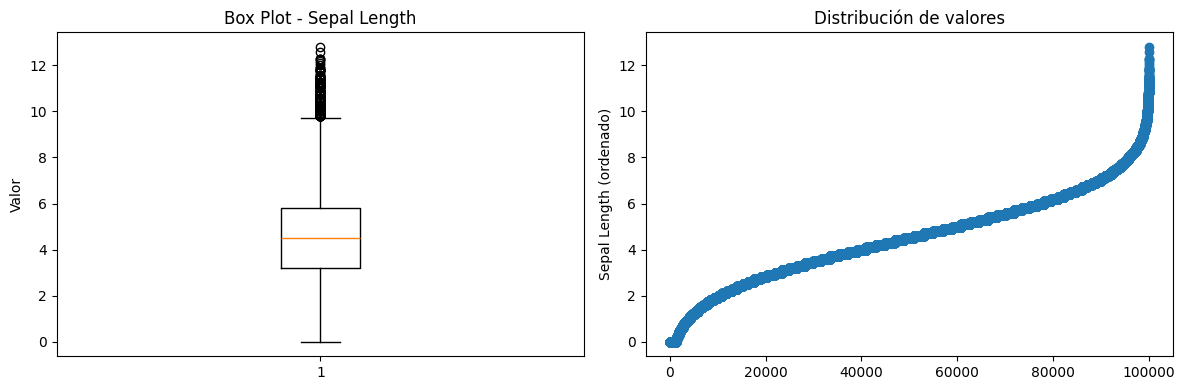

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detección por IQR
Q1 = df['Study_Hours'].quantile(0.25)
Q3 = df['Study_Hours'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['Study_Hours'] < Q1 - 1.5*IQR) | (df['Study_Hours'] > Q3 + 1.5*IQR)
print(f"Outliers detectados: {outliers.sum()}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Box plot
axes[0].boxplot(df['Study_Hours'])
axes[0].set_title('Box Plot - Sepal Length')
axes[0].set_ylabel('Valor')

# Scatter plot
axes[1].scatter(range(len(df)), df['Study_Hours'].sort_values())
axes[1].set_title('Distribución de valores')
axes[1].set_ylabel('Sepal Length (ordenado)')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Valores originales
print("*" * 40)
print("Valores originales:")
print(f"Min: {df[['Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Sleep_Duration']].min().values}")
print(f"Max: {df[['Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Sleep_Duration']].max().values}")
print("*" * 40)
# Estandarización (recomendado para modelos lineales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Sleep_Duration']])

# Después de estandarizar, cada feature tiene media=0 y std=1
print(f"Media: {X_scaled.mean(axis=0)}")  # ~0
print(f"Std: {X_scaled.std(axis=0)}")     # ~1
print("*" * 40)
# Normalización (alternativa)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(df[['Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Sleep_Duration']])

# Rango: [0, 1]
print(f"Min: {X_normalized.min(axis=0)}")
print(f"Max: {X_normalized.max(axis=0)}")
print("*" * 40)


****************************************
Valores originales:
Min: [0. 0. 0. 3.]
Max: [ 12.8  10.  149.   12. ]
****************************************
Media: [ 1.08535403e-16  2.75690581e-17  1.21218591e-16 -8.30837621e-16]
Std: [1. 1. 1. 1.]
****************************************
Min: [0. 0. 0. 0.]
Max: [1. 1. 1. 1.]
****************************************


In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding (solo si es ordinal)
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
# setosa → 0, versicolor → 1, virginica → 2
print(df.tail())
# One-Hot Encoding (para nominales - RECOMENDADO para Iris)
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
# Crea: species_versicolor, species_virginica (drop_first evita multicolinealidad)

print(df_encoded.tail())


       Student_ID  Age  Gender   Department  CGPA  Sleep_Duration  \
99995      100996   24  Female      Medical  2.02             7.0   
99996      100997   24    Male         Arts  2.33             5.0   
99997      100998   24  Female  Engineering  2.23             6.5   
99998      100999   19    Male  Engineering  3.61             6.1   
99999      101000   24  Female      Medical  2.10             7.9   

       Study_Hours  Social_Media_Hours  Physical_Activity  Stress_Level  \
99995          0.6                 1.4                 66             4   
99996          3.6                 5.2                103             3   
99997          5.8                 4.1                 61             5   
99998          4.8                 4.9                116             4   
99999          3.5                 4.0                 79             4   

       Depression  Gender_encoded  
99995       False               0  
99996       False               1  
99997       False         

In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding (solo si es ordinal)
le = LabelEncoder()
df['Department_encoded'] = le.fit_transform(df['Department'])
# setosa → 0, versicolor → 1, virginica → 2
print(df.tail())
# One-Hot Encoding (para nominales - RECOMENDADO para Iris)
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)
# Crea: species_versicolor, species_virginica (drop_first evita multicolinealidad)

print(df_encoded.tail())


       Student_ID  Age  Gender   Department  CGPA  Sleep_Duration  \
99995      100996   24  Female      Medical  2.02             7.0   
99996      100997   24    Male         Arts  2.33             5.0   
99997      100998   24  Female  Engineering  2.23             6.5   
99998      100999   19    Male  Engineering  3.61             6.1   
99999      101000   24  Female      Medical  2.10             7.9   

       Study_Hours  Social_Media_Hours  Physical_Activity  Stress_Level  \
99995          0.6                 1.4                 66             4   
99996          3.6                 5.2                103             3   
99997          5.8                 4.1                 61             5   
99998          4.8                 4.9                116             4   
99999          3.5                 4.0                 79             4   

       Depression  Gender_encoded  Department_encoded  
99995       False               0                   3  
99996       False     

In [15]:
# Resumen rápido
print(df.describe())


          Student_ID            Age           CGPA  Sleep_Duration  \
count  100000.000000  100000.000000  100000.000000   100000.000000   
mean    51000.500000      21.009010       2.898316        6.996425   
std     28867.657797       2.000382       0.532240        1.498682   
min      1001.000000      18.000000       1.560000        3.000000   
25%     26000.750000      19.000000       2.450000        6.000000   
50%     51000.500000      21.000000       2.900000        7.000000   
75%     76000.250000      23.000000       3.350000        8.000000   
max    101000.000000      24.000000       4.000000       12.000000   

         Study_Hours  Social_Media_Hours  Physical_Activity   Stress_Level  \
count  100000.000000       100000.000000      100000.000000  100000.000000   
mean        4.509517            3.503288          74.353180       4.131660   
std         1.976076            1.486852          43.366963       1.424151   
min         0.000000            0.000000           0.0000

['Age', 'CGPA', 'Sleep_Duration', 'Study_Hours']


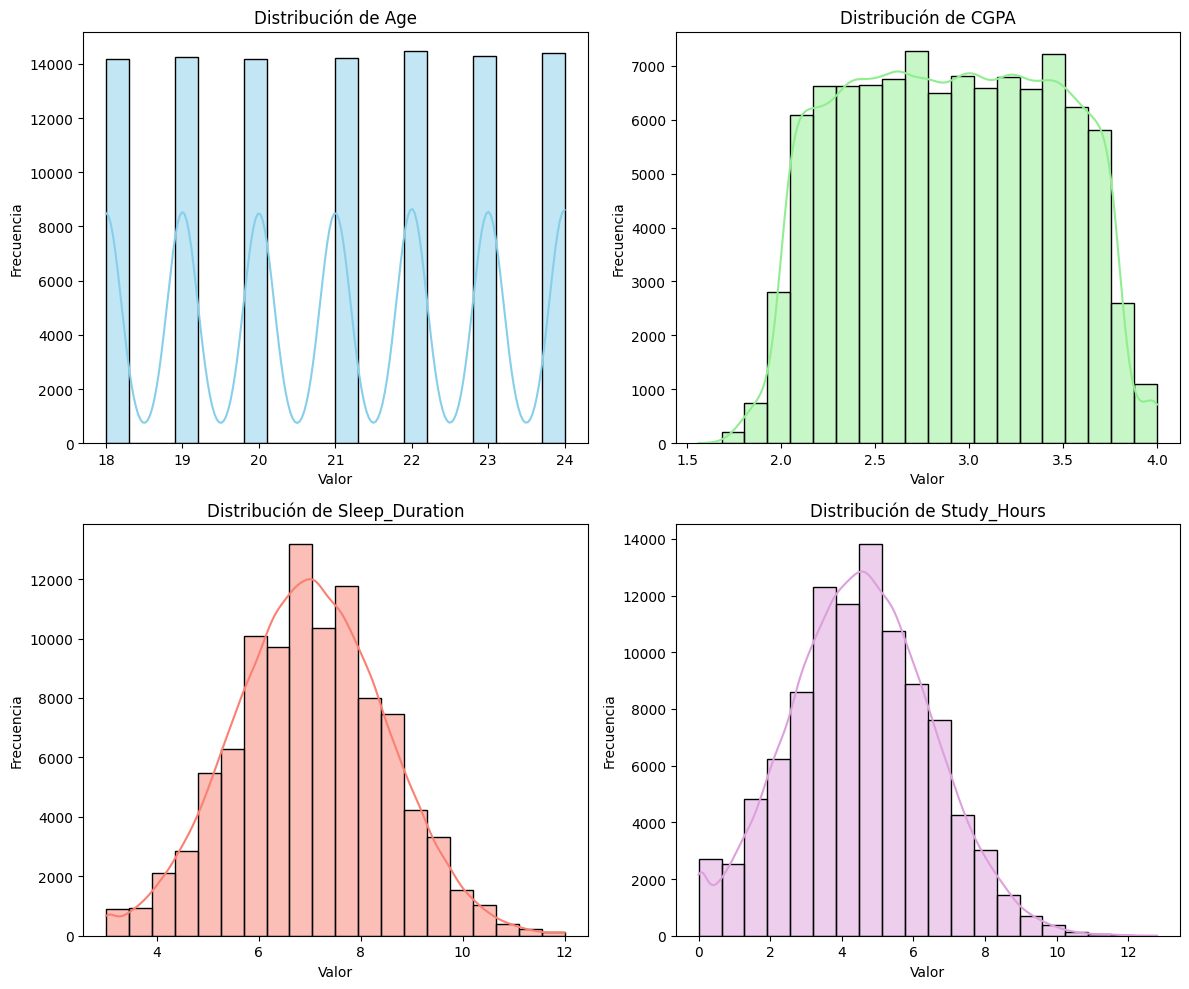

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

features = df.select_dtypes(include=[np.number]).columns.tolist()[1:5]
print(features)
colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold', 'orchid']
for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]

    # Histograma con KDE
    sns.histplot(data=df, x=feature, kde=True, bins=20, ax=ax, color=colors[idx])
    ax.set_title(f'Distribución de {feature}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


                         Age      CGPA  Sleep_Duration  Study_Hours  \
Age                 1.000000  0.003248        0.001357    -0.003808   
CGPA                0.003248  1.000000        0.015386     0.099534   
Sleep_Duration      0.001357  0.015386        1.000000     0.002744   
Study_Hours        -0.003808  0.099534        0.002744     1.000000   
Social_Media_Hours -0.000436 -0.087998       -0.003008     0.005308   
Physical_Activity  -0.003676  0.004766        0.003166    -0.002045   
Stress_Level        0.002999 -0.012287       -0.281409     0.008731   
Depression         -0.007722 -0.178971       -0.057529    -0.015932   
Gender_encoded     -0.003105 -0.005163        0.002505     0.000641   
Department_encoded -0.002833 -0.002944        0.000946    -0.003370   

                    Social_Media_Hours  Physical_Activity  Stress_Level  \
Age                          -0.000436          -0.003676      0.002999   
CGPA                         -0.087998           0.004766     -0.012

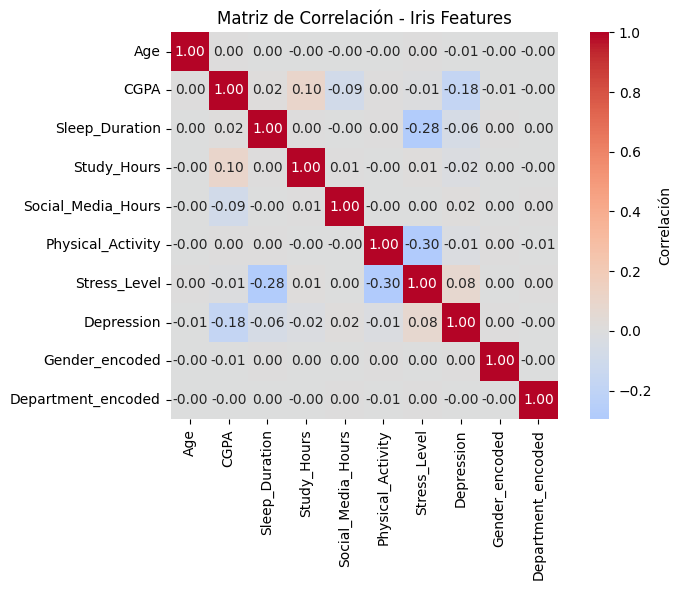

In [29]:
features = df.select_dtypes(include=[np.number]).columns.tolist()[1:]
le = LabelEncoder()

df["Depression"] = le.fit_transform(df["Depression"])
features = df.select_dtypes(include=[np.number]).columns.tolist()[1:]
# Matriz de correlación
corr_matrix = df[features].corr()
print(corr_matrix)

# Visualización
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlación'})
ax.set_title('Matriz de Correlación - Iris Features')
plt.tight_layout()
plt.show()


Depression
0    89938
1    10062
Name: count, dtype: int64


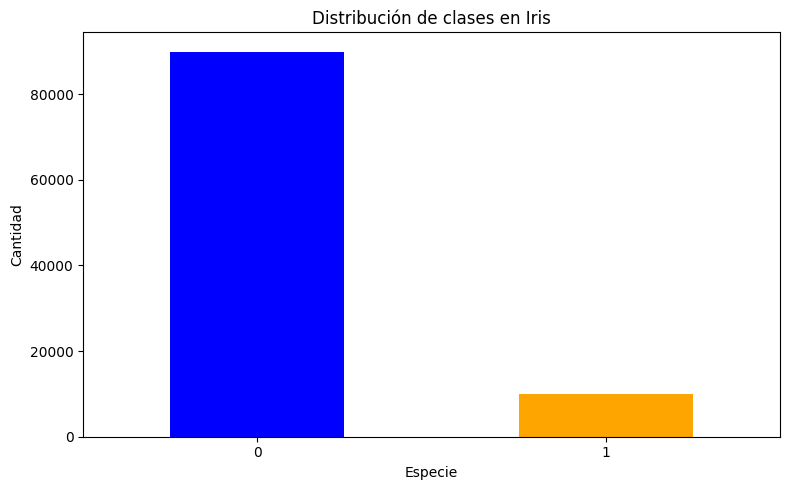

In [30]:
# Conteo de clases
print(df['Depression'].value_counts())

# Visualización
fig, ax = plt.subplots(figsize=(8, 5))
df['Depression'].value_counts().plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'])
ax.set_title('Distribución de clases en Iris')
ax.set_xlabel('Especie')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()
